## UBER CASE STUDY - DEMAND/ SUPPLY


#### Input files for analysis of all the sections

Files provided with the case study: 

   `Uber Request Data.csv`  (filesize : `395KB` , file format: `comma separated values`)<br>

### Import all the libraries

Import `numpy`, `pandaa` ,`matplotlib` , `seaborn` and `datetime` libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime


#### Ingest file and Inspect data frame

In [2]:
# Mark the start timestamp of code execution
startTime = datetime.now()

uber_df = pd.read_csv("Uber Request Data.csv")

#inspect data frame
print(uber_df.shape)
uber_df.info()

(6745, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


##### `6745 rows` and `6 columns`

#### Correct the date format issue and Convert `Request timestamp`  and `Drop timestamp` columns to `DateTime` 

1) Dates have inconsistent format; Correct it; Some places have `/` and some have `-`. Have a consistent format <br>
2) Columns imported into dataframe while reading `csv` file is imported as objects. Change the data types

In [3]:
uber_df.head(10)

# Some dates have "/" and some have "-" as date separators, change that so everything is uniform

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [4]:
uber_df['Request timestamp'] = uber_df['Request timestamp'].str.replace('/','-')
uber_df['Drop timestamp'] = uber_df['Drop timestamp'].str.replace('/','-')

In [5]:
uber_df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11-7-2016 11:51,11-7-2016 13:00
1,867,Airport,1.0,Trip Completed,11-7-2016 17:57,11-7-2016 18:47
2,1807,City,1.0,Trip Completed,12-7-2016 9:17,12-7-2016 9:58
3,2532,Airport,1.0,Trip Completed,12-7-2016 21:08,12-7-2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11-7-2016 6:46,11-7-2016 7:25


#### Dates look consistent now with just `-` instead of `-` and `\` . Let us now convert the Object to Date/Time 

In [6]:
#Convert object to datetime

uber_df['Request timestamp'] = pd.to_datetime(uber_df['Request timestamp'], dayfirst=True )
uber_df['Drop timestamp'] = pd.to_datetime(uber_df['Drop timestamp'], dayfirst=True )

print(uber_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB
None


In [7]:
uber_df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00


##### As can be seen, values such as 11/7/2016 is correctly converted to 11/07/2016 . we will convert format of the date display from `YYYY-MM-DD HH:MM:SS`to `DD-MM-YYYY HH:MM:SS `after imputing NaT

### Inspect the null values

Some columns can contain null values. Inspect the dataframe

In [8]:

print(uber_df.isnull().sum())
uber_df.head(5)

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


### Impute values in place of NaN (Driver ID) and NaT (NA dates)

Impute values for empty `Driver id` and `Drop timestamp`. These are Null due to `No Cars Available`. This can be seen by inspecting the data frame using pivot table `uber_df.pivot_table(columns = ['Driver id' , 'Status'])`. Impute those Null values as follows <br>
   1. `Driver id` will be imputed with a dummy identifier `999999`  <br>
   2. `Drop timestamp` will be imputed with a dummy identifier for such null records as `9-9-1999 00:00:00` <br>

In [9]:
#impute 999999 for  NaN driverid
uber_df.loc[pd.isnull(uber_df['Driver id']),['Driver id']] = 999999
# convert "Driver id" from floating point to int
uber_df["Driver id"] = uber_df["Driver id"].astype(int)

#impute some dummy date for NaN 9-9-1999 00:00:00 
uber_df.loc[pd.isnull(uber_df['Drop timestamp']),['Drop timestamp']] =  pd.Timestamp(1999, 9, 9, 0)
#print(uber_df.isnull().sum())

uber_df.tail(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,999999,No Cars Available,2016-07-15 23:49:03,1999-09-09
6741,6752,Airport,999999,No Cars Available,2016-07-15 23:50:05,1999-09-09
6742,6751,City,999999,No Cars Available,2016-07-15 23:52:06,1999-09-09
6743,6754,City,999999,No Cars Available,2016-07-15 23:54:39,1999-09-09
6744,6753,Airport,999999,No Cars Available,2016-07-15 23:55:03,1999-09-09


### Round off Timestamp to nearest requested hour of ride so that minutes are not missed out

1. Benefits of this step such as `17:54` which has to be rounded off to `18` <br>
2. Derive just the date from this nearest hour rounded off timestamp. Edge cases such as `23:55` get rounded off to `24` which is a day <br>

In [10]:
# Round off request timestamp to nearest hour for ease in computation of nearest requested hour of ride
uber_df['request_ts'] = uber_df['Request timestamp'].dt.round("H")
uber_df['request_hour'] = uber_df['request_ts'].dt.hour

# Round off Drop timestamp to nearest hour for ease in computation of nearest Drop hour of ride
uber_df['drop_ts'] = uber_df['Drop timestamp'].dt.round("H")
uber_df['drop_hour'] = uber_df['drop_ts'].dt.hour

# Extract dates from timestamp
uber_df['request_date'] = uber_df['request_ts'].dt.date
uber_df['drop_date'] = uber_df['drop_ts'].dt.date

#Drop Temp columns used in the round-off exercise
uber_df = uber_df.drop(['request_ts', 'drop_ts'], axis=1)

In [11]:
uber_df['request_date'] = uber_df['request_date'].astype(str)
print(uber_df['request_date'].describe())

uber_df.head(5)

count           6745
unique             6
top       2016-07-15
freq            1369
Name: request_date, dtype: object


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request_hour,drop_hour,request_date,drop_date
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,12,13,2016-07-11,2016-07-11
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,18,19,2016-07-11,2016-07-11
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,10,2016-07-12,2016-07-12
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,22,2016-07-12,2016-07-12
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,9,9,2016-07-13,2016-07-13


##### As you can see, date is stored as DateTime Object and it is read as DD-MM-YYYY HH:MM:SS however when we print it out, it always shows it as YYYY-MM-DD; Now, for the display purposes (whether using "head" or in graph (if applicable), I don't want to showcase YYYY-MM-DD ; I want the date to be displayed as DD-MM-YYYY, so I go to an extra step of using "strftime" on Panda series to convert datetime back to string object so I can display the time as per what I expect to see on the graphs (heat map/bar graph/ box plot). <br>

##### `Note: This step can be skipped if you don't want to display date as DD-MM-YYYY`<br>

In [12]:
# Convert date display to DD-MM-YYYY HH:MM:SS

uber_df['Request timestamp'] = uber_df['Request timestamp'].apply(lambda x: x.strftime('%d-%m-%Y %H:%M:%S'))
uber_df['Drop timestamp'] = uber_df['Drop timestamp'].apply(lambda x: x.strftime('%d-%m-%Y %H:%M:%S'))

                                                        
uber_df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request_hour,drop_hour,request_date,drop_date
0,619,Airport,1,Trip Completed,11-07-2016 11:51:00,11-07-2016 13:00:00,12,13,2016-07-11,2016-07-11
1,867,Airport,1,Trip Completed,11-07-2016 17:57:00,11-07-2016 18:47:00,18,19,2016-07-11,2016-07-11
2,1807,City,1,Trip Completed,12-07-2016 09:17:00,12-07-2016 09:58:00,9,10,2016-07-12,2016-07-12
3,2532,Airport,1,Trip Completed,12-07-2016 21:08:00,12-07-2016 22:03:00,21,22,2016-07-12,2016-07-12
4,3112,City,1,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,9,9,2016-07-13,2016-07-13
5,3879,Airport,1,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59,22,22,2016-07-13,2016-07-13
6,4270,Airport,1,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15,6,7,2016-07-14,2016-07-14
7,5510,Airport,1,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52,5,6,2016-07-15,2016-07-15
8,6248,City,1,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51,18,19,2016-07-15,2016-07-15
9,267,City,2,Trip Completed,11-07-2016 06:46:00,11-07-2016 07:25:00,7,7,2016-07-11,2016-07-11


##### `Note: This step can be skipped if you don't want to display date as DD-MM-YYYY`<br>

In [13]:
# Pull the dates and convert them to DD-MM-YYYY

uber_df['request_date'] = pd.to_datetime(uber_df['request_date'])
uber_df['drop_date'] = pd.to_datetime(uber_df['drop_date'])
uber_df['request_date'] = uber_df['request_date'].apply(lambda x: x.strftime('%d-%m-%Y'))
uber_df['drop_date'] = uber_df['drop_date'].apply(lambda x: x.strftime('%d-%m-%Y'))


uber_df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request_hour,drop_hour,request_date,drop_date
0,619,Airport,1,Trip Completed,11-07-2016 11:51:00,11-07-2016 13:00:00,12,13,11-07-2016,11-07-2016
1,867,Airport,1,Trip Completed,11-07-2016 17:57:00,11-07-2016 18:47:00,18,19,11-07-2016,11-07-2016
2,1807,City,1,Trip Completed,12-07-2016 09:17:00,12-07-2016 09:58:00,9,10,12-07-2016,12-07-2016
3,2532,Airport,1,Trip Completed,12-07-2016 21:08:00,12-07-2016 22:03:00,21,22,12-07-2016,12-07-2016
4,3112,City,1,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,9,9,13-07-2016,13-07-2016
5,3879,Airport,1,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59,22,22,13-07-2016,13-07-2016
6,4270,Airport,1,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15,6,7,14-07-2016,14-07-2016
7,5510,Airport,1,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52,5,6,15-07-2016,15-07-2016
8,6248,City,1,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51,18,19,15-07-2016,15-07-2016
9,267,City,2,Trip Completed,11-07-2016 06:46:00,11-07-2016 07:25:00,7,7,11-07-2016,11-07-2016


### Derive new column `Hourslot` (that segments hours into 4 buckets ) and `TypeOfTrip`

1. Slice the Dataframe into 4 buckets and then concatenate them after adding the appropriate labels <br>
2. Create a new column "TypeOfTrip". This column identifies if trip is from `Airport to City` or `City to Airport` <br>

In [14]:
#Rename columns for simplicity

#uber_df.info()
uber_df.rename(columns={"Request id": "RequestId", 
                   "Pickup point": "PickupPoint" , 
                   "Driver id": "DriverId" , 
                    "Status" : "Booking_Status" ,
                   "Request timestamp": "Request_timestamp" ,
                   "Drop timestamp": "Drop_timestamp" ,
                   "Pickup point": "PickupPoint"} , inplace = True)
#uber_df.head(10)

slot_0_6 =  uber_df.loc[(uber_df.request_hour >= 0) & (uber_df.request_hour <= 6) , :]
slot_6_12 =  uber_df.loc[(uber_df.request_hour > 6) & (uber_df.request_hour <= 12) , :]
slot_12_18 =  uber_df.loc[(uber_df.request_hour > 12) & (uber_df.request_hour <= 18) , :]
slot_18_24 =  uber_df.loc[(uber_df.request_hour > 18) & (uber_df.request_hour <= 24) , :]

slot_0_6['HourSlot'] = '12AM-6AM'
slot_6_12['HourSlot'] = '6AM-12PM'
slot_12_18['HourSlot'] = '12PM-6PM'
slot_18_24['HourSlot'] = '6PM-12AM'

uber_df = pd.concat([slot_0_6, slot_6_12, slot_12_18, slot_18_24], axis = 0)

#drop temp data frames used in the process 
del slot_0_6 , slot_6_12 , slot_12_18 , slot_18_24 



### Data frame now has `12` columns. Check the shape and total `null` values

As we see below, Null (NaN, NaT / data quality issues have been addressed. All columns look good

In [15]:
print(uber_df.shape)

print(uber_df.isnull().sum())
uber_df.head(5)

(6745, 11)
RequestId            0
PickupPoint          0
DriverId             0
Booking_Status       0
Request_timestamp    0
Drop_timestamp       0
request_hour         0
drop_hour            0
request_date         0
drop_date            0
HourSlot             0
dtype: int64


,RequestId,PickupPoint,DriverId,Booking_Status,Request_timestamp,Drop_timestamp,request_hour,drop_hour,request_date,drop_date,HourSlot
6,4270,Airport,1,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15,6,7,14-07-2016,14-07-2016,12AM-6AM
7,5510,Airport,1,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52,5,6,15-07-2016,15-07-2016,12AM-6AM
10,1467,Airport,2,Trip Completed,12-07-2016 05:08:00,12-07-2016 06:02:00,5,6,12-07-2016,12-07-2016,12AM-6AM
12,2784,Airport,2,Trip Completed,13-07-2016 04:49:20,13-07-2016 05:23:03,5,5,13-07-2016,13-07-2016,12AM-6AM
26,5434,City,3,Trip Completed,15-07-2016 02:41:38,15-07-2016 03:24:43,3,3,15-07-2016,15-07-2016,12AM-6AM


### Find the more pressing problem for Uber looking at the data set and `Plotting` graphs

The approach is as follows: <br>
 1)Create two data frames `Airport2City` and `City2Airport`. The reason for taking this approach is we don't want to mix both these routes and want to analyse them separately <br>
 2) Analyse the Demand for cabs by deriving median and 25th , 50th, 75th and 100th percentiles. Determine the `peak hour of demand` in `airport` and `city`<br>
 3) Analyse `Time slots` and see where all cabs are concentrated during those time slots (`Graph cab concentration heat maps` <br>
 4) Analyse `Peak hour` and `Cab concentration heat map` and arrive at conclusion<br>
 5) Perform `further drill-down` if necessary <br>
 
 

In [16]:
# Create two data frames Airport2City and City2Airport for ease in analysing two cab routes
Airport2City = uber_df.loc[uber_df['PickupPoint'] == 'Airport', :]
City2Airport = uber_df.loc[uber_df['PickupPoint'] == 'City', :]
#
Airport2City.head(4)

,RequestId,PickupPoint,DriverId,Booking_Status,Request_timestamp,Drop_timestamp,request_hour,drop_hour,request_date,drop_date,HourSlot
6,4270,Airport,1,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15,6,7,14-07-2016,14-07-2016,12AM-6AM
7,5510,Airport,1,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52,5,6,15-07-2016,15-07-2016,12AM-6AM
10,1467,Airport,2,Trip Completed,12-07-2016 05:08:00,12-07-2016 06:02:00,5,6,12-07-2016,12-07-2016,12AM-6AM
12,2784,Airport,2,Trip Completed,13-07-2016 04:49:20,13-07-2016 05:23:03,5,5,13-07-2016,13-07-2016,12AM-6AM


In [17]:
City2Airport.head(4)

,RequestId,PickupPoint,DriverId,Booking_Status,Request_timestamp,Drop_timestamp,request_hour,drop_hour,request_date,drop_date,HourSlot
26,5434,City,3,Trip Completed,15-07-2016 02:41:38,15-07-2016 03:24:43,3,3,15-07-2016,15-07-2016,12AM-6AM
34,4075,City,4,Trip Completed,14-07-2016 02:17:35,14-07-2016 03:21:38,2,3,14-07-2016,14-07-2016,12AM-6AM
62,4105,City,7,Trip Completed,14-07-2016 03:39:38,14-07-2016 04:39:04,4,5,14-07-2016,14-07-2016,12AM-6AM
81,4023,City,9,Trip Completed,13-07-2016 23:58:41,14-07-2016 00:58:39,0,1,14-07-2016,14-07-2016,12AM-6AM


### `ANALYSIS OF DATA FRAMES` <br>

##### Let us analyse where cars are concentrated at during different time slots

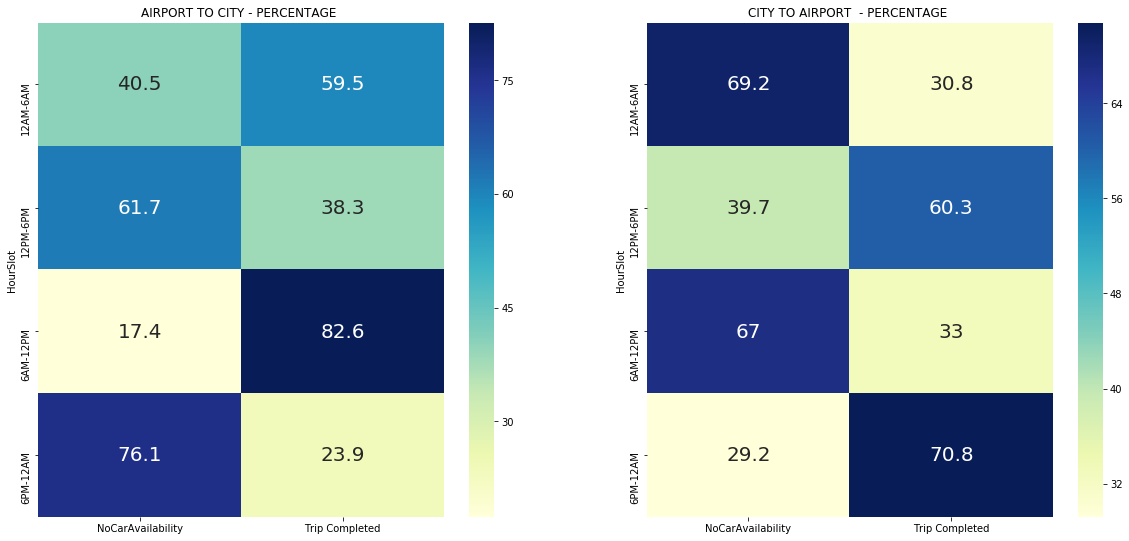

In [18]:
##########################
#### AIRPORT TO CITY #####
###########################
# Data frame for Ride completed
ride_cmplt_df_a2c = Airport2City.loc[Airport2City['Booking_Status'] == 'Trip Completed', :]
# Data frame for Unavailability of Cabs
ride_unavailable_df_a2c = Airport2City.loc[ (Airport2City['Booking_Status'] == 'Cancelled') | (Airport2City['Booking_Status'] == 'No Cars Available'), :]
ride_unavailable_df_a2c['Booking_Status'] ='No Car Available/Cancelled'
# Concatenate two of the data frames and pivot it out
ride_df_a2c = pd.concat([ride_cmplt_df_a2c, ride_unavailable_df_a2c], axis = 0)
#Summary pivot
summary_pvt_a2c = pd.pivot_table(ride_df_a2c, values='RequestId', 
                                   index='HourSlot', 
                                   columns=['Booking_Status'], 
                                   aggfunc='count')
summary_pvt_a2c

#Add Total to derive percentage
total_pvt_a2c = pd.pivot_table(ride_df_a2c, values=['RequestId'], 
                                   index='HourSlot', 
                                 aggfunc='count')
total_pvt_a2c = pd.concat([summary_pvt_a2c, total_pvt_a2c], axis = 1)
# Rename columns for readability
total_pvt_a2c.rename(columns={ total_pvt_a2c.columns[0] : "NoCarAvailability", 
                            total_pvt_a2c.columns[2]: "TripComplete" , 
                             "RequestId": "TotalBookings"}, inplace = True)
total_pvt_a2c =  round(total_pvt_a2c.iloc[:,0:].div(total_pvt_a2c.TotalBookings , axis=0)*100,1)
total_pvt_a2c

total_pvt_a2c.drop(columns=['TotalBookings'] , inplace = True)

##########################
#### CITY TO AIRPORT #####
###########################

# Data frame for Ride completed
ride_cmplt_df_c2a = City2Airport.loc[City2Airport['Booking_Status'] == 'Trip Completed', :]
# Data frame for Unavailability of Cabs
ride_unavailable_df_c2a = City2Airport.loc[ (City2Airport['Booking_Status'] == 'Cancelled') | (City2Airport['Booking_Status'] == 'No Cars Available'), :]
ride_unavailable_df_c2a['Booking_Status'] ='No Car Available/Cancelled'
# Concatenate two of the data frames and pivot it out
ride_df_c2a = pd.concat([ride_cmplt_df_c2a, ride_unavailable_df_c2a], axis = 0)
#Summary pivot
summary_pvt_c2a = pd.pivot_table(ride_df_c2a, values='RequestId', 
                                   index='HourSlot', 
                                   columns=['Booking_Status'], 
                                   aggfunc='count')
summary_pvt_c2a

#Add Total to derive percentage
total_pvt_c2a = pd.pivot_table(ride_df_c2a, values=['RequestId'], 
                                   index='HourSlot', 
                                 aggfunc='count')
total_pvt_c2a = pd.concat([summary_pvt_c2a, total_pvt_c2a], axis = 1)
# Rename columns for readability
total_pvt_c2a.rename(columns={ total_pvt_c2a.columns[0] : "NoCarAvailability", 
                            total_pvt_c2a.columns[2]: "TripComplete" , 
                             "RequestId": "TotalBookings"}, inplace = True)
total_pvt_c2a =  round(total_pvt_c2a.iloc[:,0:].div(total_pvt_c2a.TotalBookings , axis=0)*100,1)
total_pvt_c2a

total_pvt_c2a.drop(columns=['TotalBookings'] , inplace = True)


#######################
#### PLOT BOTH GRAPHS ########
########################
# Referred this link for fmt ='g' to display entire numbers instead of exponential form for annotation
# https://docs.python.org/2/library/string.html#format-specification-mini-language

#Font size was literally unreadable, I had to refer to this link to pick up annot_kws parameter to fix the font readability issues
#https://github.com/mwaskom/seaborn/issues/430

plt.figure(figsize=(20, 20))
# subplot 1
plt.subplot(2, 2, 1)
plt.title("AIRPORT TO CITY - PERCENTAGE ")
sns.heatmap(total_pvt_a2c, cmap="YlGnBu", annot=True ,annot_kws={"size": 20} ,  fmt='g')

# subplot 2 
plt.subplot(2, 2, 2)
plt.title("CITY TO AIRPORT  - PERCENTAGE ")
sns.heatmap(total_pvt_c2a, cmap="YlGnBu", annot=True , annot_kws={"size": 20},  fmt='g')



plt.show()



### Inferences from heat map on availability of Cars

##### `AIRPORT TO CITY` <br>
1. `6PM-12AM` has 76% unavailability (Top 1)  <br>
2. `12PM-6PM` has 62% unavailability (Top 2)  <br>
3. `12AM-6AM` has 41% unavailability (Top 3)  <br>

##### `CITY TO AIRPORT` <br>
1. `12AM-6AM` has 69% unavailability (Top 1)  <br>
2. `6AM-12PM` has 67% unavailability (Top 2)  <br>
3. `12PM-6PM` has 40% unavailability (Top 3)  <br>
 

##### We will halt further drill-down for now and pick it up later;  let's look at the Customer demand analysis


### Customer demand analysis

1. Calculate the `Median` and all the `quantiles` <br>
2. Draw the `Histogram` and `Box plot` to analyse the spread <br>
3. Pick the `Peak hour` of commute in both directions `Airport-> City` and `City->Airport`


In [19]:
print ("**************** ")
print ("AIRPORT TO CITY ")
print ("**************** ")
print ("MEAN" , Airport2City.request_hour.mean())
print ("MEDIAN" , Airport2City.request_hour.median())
print ("1ST QUANTILE (Q1)" , Airport2City.request_hour.quantile(0.25))
# Median same as Q2
print ("2ND QUANTILE (Q2)" , Airport2City.request_hour.quantile(0.50))
print ("3RD QUANTILE (Q3)" , Airport2City.request_hour.quantile(0.75))
print ("4TH QUANTILE (Q4)" , Airport2City.request_hour.quantile(1))

print ("**************** ")
print ("CITY TO AIRPORT ")
print ("**************** ")
print ("MEAN" , City2Airport.request_hour.mean())
print ("MEDIAN" , City2Airport.request_hour.median())
print ("1ST QUANTILE (Q1)" , City2Airport.request_hour.quantile(0.25))
print ("2ND QUANTILE (Q2)" , City2Airport.request_hour.quantile(0.50))
# Median same as Q2
print ("3RD QUANTILE (Q3)" , City2Airport.request_hour.quantile(0.75))
print ("4TH QUANTILE (Q4) " , City2Airport.request_hour.quantile(1))




**************** 
AIRPORT TO CITY 
**************** 
MEAN 15.619518221124151
MEDIAN 18.0
1ST QUANTILE (Q1) 11.0
2ND QUANTILE (Q2) 18.0
3RD QUANTILE (Q3) 20.0
4TH QUANTILE (Q4) 23.0
**************** 
CITY TO AIRPORT 
**************** 
MEAN 10.747077274023383
MEDIAN 9.0
1ST QUANTILE (Q1) 6.0
2ND QUANTILE (Q2) 9.0
3RD QUANTILE (Q3) 15.0
4TH QUANTILE (Q4)  23.0


### Plot Historgram to analyse the spread

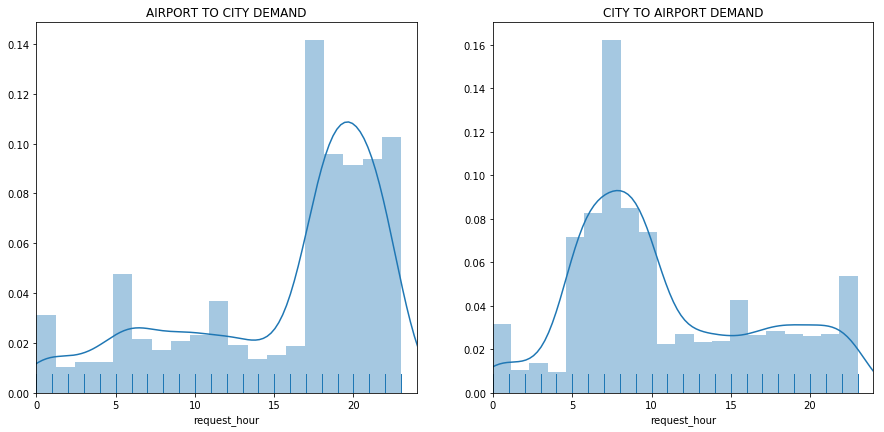

In [20]:
plt.figure(1 , figsize=(15, 15))

# subplot 1
plt.subplot(2, 2, 1)
plt.title("AIRPORT TO CITY DEMAND")
sns.distplot(Airport2City['request_hour'], rug=True).set(xlim=(0, 24))


# subplot 2 
plt.subplot(2, 2, 2)
plt.title("CITY TO AIRPORT DEMAND")
sns.distplot(City2Airport['request_hour'], rug=True).set(xlim=(0, 24))



plt.show()

### Use the Box Plot and whiskers to analyse the median and Q1, Q2, Q3 and Q4 (first, second, third and fourth quantiles)

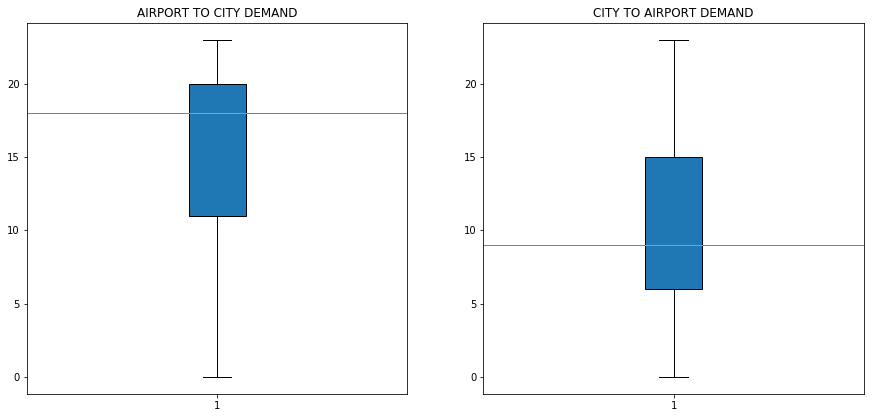

In [21]:
plt.figure(1 , figsize=(15, 15))

#Syntax for Reference line "axhline" snf "patch_artist" is sourced from https://matplotlib.org

# subplot 1
plt.subplot(2, 2, 1)
plt.title("AIRPORT TO CITY DEMAND")
plt.boxplot(Airport2City['request_hour'] , patch_artist=True)
plt.axhline(18, color='black', lw=.5)



# subplot 2 
plt.subplot(2, 2, 2)
plt.title("CITY TO AIRPORT DEMAND")
plt.boxplot(City2Airport['request_hour'], patch_artist=True)
plt.axhline(9, color='black', lw=.5)


plt.show()

### Inferences from EDA analysis on Demand and from box plot and histograms

##### `AIRPORT TO CITY`
1. `6PM` is `Busiest hour` denoted by `Median` line<br>


##### `CITY TO AIRPORT`
1. `9AM` is `Busiest hour` as denoted by `Median` line. Histogram is misleading; however, When plotted Individually as will be shown below, majority of median lines pass through 9 <br>

##### `COMBINED ANALYSIS BY TAKING INTO ACCOUNT THE HEAT MAP ABOVE ON CAB AVAILABILITY`  <br>
1. At `6PM` ,  all the cabs are in the `City` Heading towards `Airport` ; which is the reason `no cabs` are available at the `Airport`. `Planning to have buffer cabs in the Airport at 6PM will be profitable for Uber`  <br>
2. At `9AM`,  all cabs are at the `Airport` which is the reason no cabs are available in the `City`. `Planning to have buffer cabs in the City at 9AM will be profitable for Uber` <br> 


### Driver behavior analysis during peak hour (further drill down)

In [22]:
# Let us check driver behavior during peak hours
# Peak hour airport to City route is 6PM ; let's exclude no cars available and just focus on completion/cancellations
behavior_df1 = Airport2City.loc[Airport2City['Booking_Status'] != 'No Cars Available', :] 
behavior_df1 = behavior_df1.loc[behavior_df1['request_hour'] == 18 ]

# Peak hour City to Airport route is 9AM ; let's exclude no cars available and just focus on completion/cancellations
behavior_df2 = City2Airport.loc[City2Airport['Booking_Status'] != 'No Cars Available', :] 
behavior_df2 = behavior_df2.loc[behavior_df2['request_hour'] == 9 ]

behavior_df = pd.concat([behavior_df1,behavior_df2], axis = 0 )

del behavior_df1 , behavior_df2

behavior_pivot = pd.pivot_table(behavior_df, values='RequestId', 
                                   index='DriverId', 
                                   columns='Booking_Status', 
                                   aggfunc='count')

#### Top 10 Cab drivers

In [23]:
Top10Drivers = behavior_pivot.sort_values('Trip Completed', ascending= False).head(10) 
# Rewarding these top 10 drivers will boost morale of more drivers and encourage them to drive during peak hours
Top10Drivers.drop(columns='Cancelled', inplace= True)
Top10Drivers

Booking_Status,Trip Completed
DriverId,
134,4.0
1,3.0
215,3.0
211,3.0
212,2.0
58,2.0
61,2.0
62,2.0
254,2.0


#### Bottom 10 Cab drivers who Cancel a lot of trips during peak hour



In [24]:
Bottom10Drivers = behavior_pivot.sort_values('Cancelled', ascending= False).head(10)
Bottom10Drivers.drop(columns='Trip Completed', inplace= True)
# Punishing these drivers with lesser credits will teach them to be more productive and not to cancel trips 
# during peak hours
Bottom10Drivers

Booking_Status,Cancelled
DriverId,
138,4.0
258,3.0
88,3.0
120,3.0
99,3.0
27,3.0
69,3.0
294,3.0
210,3.0


### Analyse `No Cars Available` and see if these are affecting `cab availability` during `peak hour`

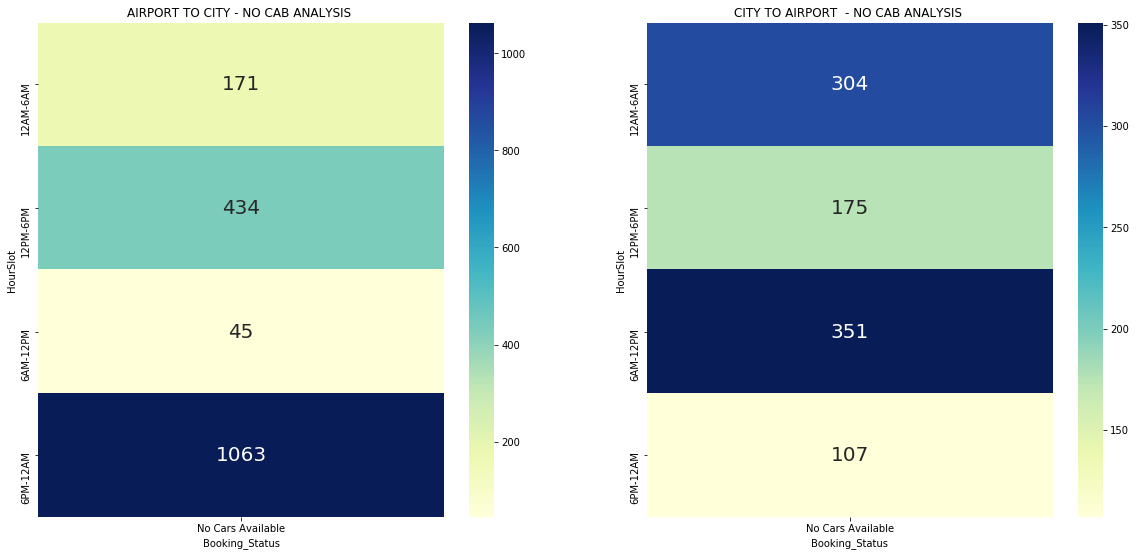

In [25]:
ncavail_a2c = Airport2City.loc[Airport2City['Booking_Status'] == 'No Cars Available', :] 
ncavail_c2a = City2Airport.loc[City2Airport['Booking_Status'] == 'No Cars Available', :] 


ncavail_a2c_pvt = pd.pivot_table(ncavail_a2c, values='RequestId', 
                                   index='HourSlot', 
                                   columns=['Booking_Status'], 
                                   aggfunc='count')

ncavail_c2a_pvt = pd.pivot_table(ncavail_c2a, values='RequestId', 
                                   index='HourSlot', 
                                   columns=['Booking_Status'], 
                                   aggfunc='count')



plt.figure(figsize=(20, 20))
# subplot 1
plt.subplot(2, 2, 1)
plt.title("AIRPORT TO CITY - NO CAB ANALYSIS ")
sns.heatmap(ncavail_a2c_pvt, cmap="YlGnBu", annot=True ,annot_kws={"size": 20} ,  fmt='g')

# subplot 2 
plt.subplot(2, 2, 2)
plt.title("CITY TO AIRPORT  - NO CAB ANALYSIS ")
sns.heatmap(ncavail_c2a_pvt, cmap="YlGnBu", annot=True , annot_kws={"size": 20},  fmt='g')






#### No cabs available heat map analysis

From previous analysis : <br>

`AIRPORT TO CITY` <br>
`6PM` is `Busiest` hour  <br>
`CITY TO AIRPORT` <br>
`9AM` is `Busiest` hour <br>

`AIRPORT TO CITY` <br>
1) Cabs are not available during busy hour and hence needs attention thus fortifying analysis as was stated previously. More cabs to be introduced for the `busy hour of demand` at `Airport`  <br>

`CITY TO AIRPORT` <br>
1) Cabs are not available during busy hour and hence needs attention thus fortifying analysis as was stated previously. More cabs to be introduced for the `busy hour of demand` at `City` <br>

### We have analysed data with all the days combined; lets plot the day-wise distribution for the collected dates and see if we had to consider a day separately or our analysis still holds true?

In [26]:
requestdate_a2c = Airport2City.groupby(['request_date']).count()
requestdate_a2c
#requestdate_c2a = Airport2City.groupby(['request_date']).count()
#requestdate_c2a
#City to airport has similar request dates and hence this is commented. uncomment to see the result
# i.e 11-07-2016 through 16-07-2016. Sample size of 16-07-2016 is small ; this date is obtained as we rounded off
# Date to nearest hour

,RequestId,PickupPoint,DriverId,Booking_Status,Request_timestamp,Drop_timestamp,request_hour,drop_hour,drop_date,HourSlot
request_date,,,,,,,,,,
11-07-2016,654,654,654,654,654,654,654,654,654,654
12-07-2016,681,681,681,681,681,681,681,681,681,681
13-07-2016,663,663,663,663,663,663,663,663,663,663
14-07-2016,604,604,604,604,604,604,604,604,604,604
15-07-2016,620,620,620,620,620,620,620,620,620,620
16-07-2016,16,16,16,16,16,16,16,16,16,16


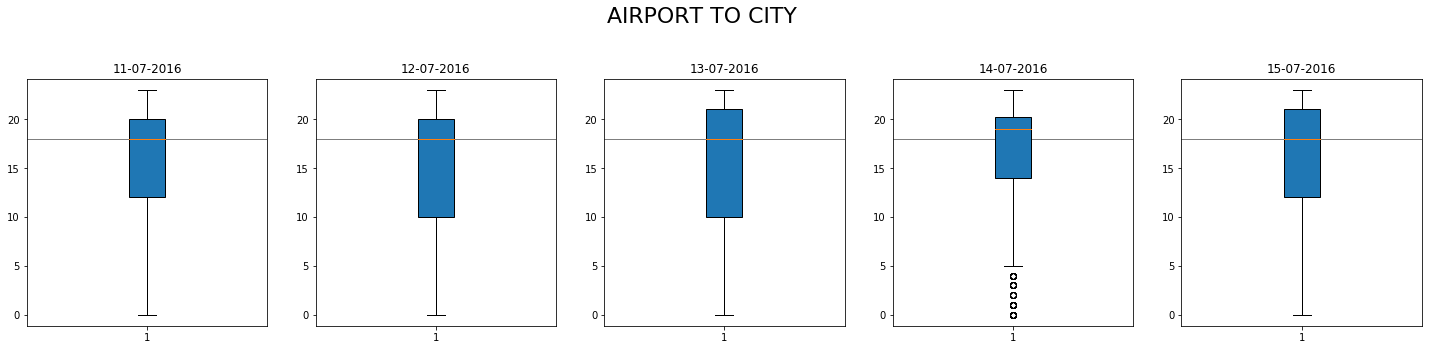

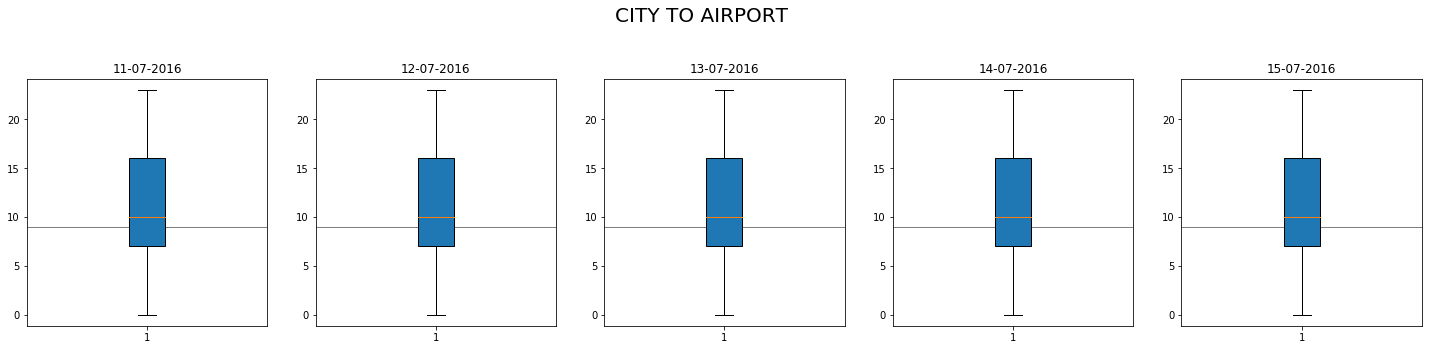

In [27]:
#AIRPORT TO CITY

#Analysis across 8 dates
timeslot1_a2c = Airport2City.loc[Airport2City['request_date']== '11-07-2016', :]
timeslot2_a2c = Airport2City.loc[Airport2City['request_date']== '12-07-2016', :]
timeslot3_a2c = Airport2City.loc[Airport2City['request_date']== '13-07-2016', :]
timeslot4_a2c = Airport2City.loc[Airport2City['request_date']== '14-07-2016', :]
timeslot5_a2c = Airport2City.loc[Airport2City['request_date']== '15-07-2016', :]
# We will skip 16-07-2016 as it is result of rounded off timings and sample is lesser (16)
timeslot6_a2c = Airport2City.loc[Airport2City['request_date']== '16-07-2016', :]

# CITY TO AIRPORT 
#Analysis across 8 dates
timeslot1_c2a = City2Airport.loc[City2Airport['request_date']== '11-07-2016', :]
timeslot2_c2a = City2Airport.loc[City2Airport['request_date']== '12-07-2016', :]
timeslot3_c2a = City2Airport.loc[City2Airport['request_date']== '13-07-2016', :]
timeslot4_c2a = City2Airport.loc[City2Airport['request_date']== '14-07-2016', :]
timeslot5_c2a = City2Airport.loc[City2Airport['request_date']== '15-07-2016', :]
# We will skip 16-07-2016 as it is result of rounded off timings and sample is lesser (16)
#timeslot6_c2a = City2Airport.loc[City2Airport['request_date']== '16-07-2016', :]

#########################################
####### PLOT AIRPORT TO CITY BOX SUBPLOTS
##########################################
#Syntax for Reference line "axhline" and patch_artist is sourced from https://matplotlib.org
plt.figure(1 , figsize=(25, 10))
plt.suptitle("AIRPORT TO CITY", fontsize=22)



# subplot 1
plt.subplot(2, 5, 1)
plt.title("11-07-2016")
plt.boxplot(timeslot1_a2c['request_hour'], patch_artist=True )
plt.axhline(18, color='black', lw=.5)



# subplot 2 
plt.subplot(2, 5, 2)
plt.title("12-07-2016")
plt.boxplot(timeslot2_a2c['request_hour'], patch_artist=True)
plt.axhline(18, color='black', lw=.5)



# subplot 3 
plt.subplot(2, 5, 3)
plt.title("13-07-2016")
plt.boxplot(timeslot3_a2c['request_hour'], patch_artist=True)
plt.axhline(18, color='black', lw=.5)



# subplot 4 
plt.subplot(2, 5, 4)
plt.title("14-07-2016")
plt.boxplot(timeslot4_a2c['request_hour'], patch_artist=True)
plt.axhline(18, color='black', lw=.5)




# subplot 5 
plt.subplot(2, 5, 5)
plt.title("15-07-2016")
plt.boxplot(timeslot5_a2c['request_hour'], patch_artist=True)
plt.axhline(18, color='black', lw=.5)

# subplot 6

#plt.subplot(2, 6, 6)
#plt.title("16-07-2016")
#plt.boxplot(timeslot6_a2c['request_hour'], patch_artist=True)
#plt.axhline(18, color='black', lw=.5)




#########################################
####### PLOT CITY TO AIRPORT BOX SUBPLOTS
##########################################

plt.figure(2 , figsize=(25, 10))
plt.suptitle("CITY TO AIRPORT", fontsize=20)


# subplot 1
plt.subplot(2, 5, 1)
plt.title("11-07-2016")
plt.boxplot(timeslot2_c2a['request_hour'], patch_artist=True )
plt.axhline(9, color='black', lw=.5)



# subplot 2 
plt.subplot(2, 5, 2)
plt.title("12-07-2016")
plt.boxplot(timeslot2_c2a['request_hour'], patch_artist=True)
plt.axhline(9, color='black', lw=.5)



# subplot 3 
plt.subplot(2, 5, 3)
plt.title("13-07-2016")
plt.boxplot(timeslot2_c2a['request_hour'], patch_artist=True)
plt.axhline(9, color='black', lw=.5)



# subplot 4 
plt.subplot(2, 5, 4)
plt.title("14-07-2016")
plt.boxplot(timeslot2_c2a['request_hour'], patch_artist=True)
plt.axhline(9, color='black', lw=.5)




# subplot 5 
plt.subplot(2, 5, 5)
plt.title("15-07-2016")
plt.boxplot(timeslot2_c2a['request_hour'], patch_artist=True)
plt.axhline(9, color='black', lw=.5)

# subplot 6

#plt.subplot(2, 6, 6)
#plt.title("16-07-2016")
#plt.boxplot(timeslot2_c2a['request_hour'], patch_artist=True)
#plt.axhline(18, color='black', lw=.5)


plt.show()

### Conclusion from boxplots checked on each day of analysis indicate same observation  

##### `AIRPORT TO CITY`
1. `6PM` is `Busiest hour` denoted by `Median` line when observed across different dates<br>


##### `CITY TO AIRPORT`

1. `9AM` is `Busiest hour`denoted by `Median` line when observed across different dates<br>



#### SUMMARY BASED ON ALL THE ANALYSIS CONDUCTED ABOVE


1. At `6PM` ,  all the cabs are in the `City` Heading towards `Airport` ; which is the reason `no cabs` are available at the `Airport`. `Planning to have buffer cabs in the Airport at 6PM will be profitable for Uber`  <br>
2. At `9AM`,  all cabs are at the `Airport` which is the reason no cabs are available in the `City`. `Planning to have buffer cabs in the City at 9AM will be profitable for Uber` <br> 
3. Top performing driver list during peak hour is provided. Uber can use the data to reward the performing drivers and take some steps for changing route/taking further steps to factor underperforming drivers <br>



In [28]:
# End of code, print total time taken for execution
print('\nTime elasped: ', datetime.now() - startTime)
#


Time elasped:  0:00:05.288621
